# **Importing Modules**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray 
from skimage.transform import resize 
from skimage import data,feature
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# **Taking dataset**

In [2]:
datasetpath = 'dataset'

converting dataset to batchs by tensorflow pipeline

In [3]:
BATCH_SIZE = 30
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    datasetpath,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 3000 files belonging to 3 classes.


# **conveting dataset to HoG**

In [4]:
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize
import numpy as np

dataseth = []
datalabel = []
featureo =[]

for image_batch, labels_batch in dataset.take(150):
    for i in range(30):
        img = image_batch[i].numpy().astype("float")
        grayim = rgb2gray(img) 
        gI1 = resize(grayim,(80,80))
        (H, hogImage) = hog(gI1, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2), transform_sqrt=True, visualize=True)
        image = np.array(hogImage).flatten()
        dataseth.append(H)
        featureo.append(image)
        datalabel.append(labels_batch[i])


# **Implementing SVM**

Accuracy:  0.7472222222222222


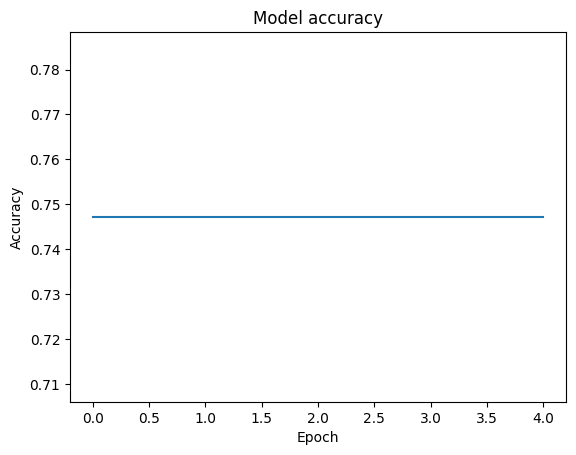

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(featureo, datalabel, test_size=0.12)

# Initializing and fitting the SVM classifier
clf = SVC(C=9, kernel='linear')
clf.fit(x_train, y_train)

# Predicting on the test data
y_pred = clf.predict(x_test)

# Calculating accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

# # Plotting accuracy and validation loss curve
# history = clf.fit(x_train, y_train)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

accuracies = []
for epoch in range(5):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(accuracies)
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# Initializing and fitting the SVM classifier
# clf = SVC(C=9, kernel='linear')
# for epoch in range(500):
#     clf.fit(x_train, y_train)

# # Predicting on the test data
# y_pred = clf.predict(x_test)

# # Calculating accuracy
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy: ", acc)


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

featureo = np.array(featureo)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(featureo,datalabel, test_size= 0.18)

# One hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
# model = Sequential()
# model.add(Dense(64, input_shape=(4,), activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))
model = Sequential()
model.add(Dense(6400, input_shape=(6400,), activation='relu'))

model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
# model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
77/77 [==============================] - 19s 236ms/step - loss: 0.9400 - accuracy: 0.5423 - val_loss: 0.6084 - val_accuracy: 0.7222
Epoch 2/25
77/77 [==============================] - 18s 231ms/step - loss: 0.6049 - accuracy: 0.7114 - val_loss: 0.5905 - val_accuracy: 0.7111
Epoch 3/25
77/77 [==============================] - 18s 233ms/step - loss: 0.5216 - accuracy: 0.7626 - val_loss: 0.5707 - val_accuracy: 0.7444
Epoch 4/25
77/77 [==============================] - 18s 228ms/step - loss: 0.4874 - accuracy: 0.7789 - val_loss: 0.5197 - val_accuracy: 0.7704
Epoch 5/25
77/77 [==============================] - 18s 228ms/step - loss: 0.4630 - accuracy: 0.7963 - val_loss: 0.5366 - val_accuracy: 0.7648
Epoch 6/25
77/77 [==============================] - 18s 229ms/step - loss: 0.3832 - accuracy: 0.8329 - val_loss: 0.6634 - val_accuracy: 0.7630
Epoch 7/25
77/77 [==============================] - 18s 228ms/step - loss: 0.3804 - accuracy: 0.8329 - val_loss: 0.5320 - val_accuracy: 0.7852

In [10]:
print(accuracy)

NameError: name 'accuracy' is not defined

0.8685185185185185

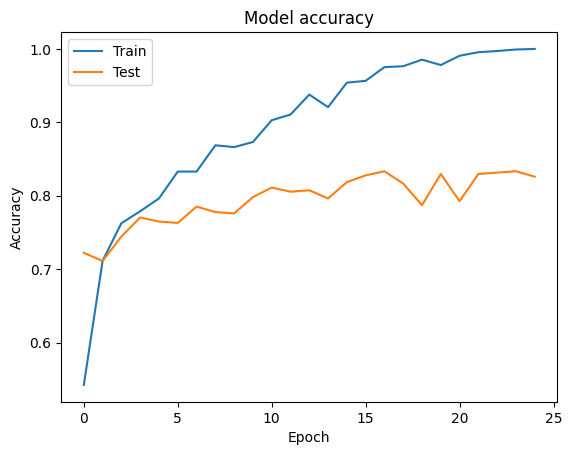

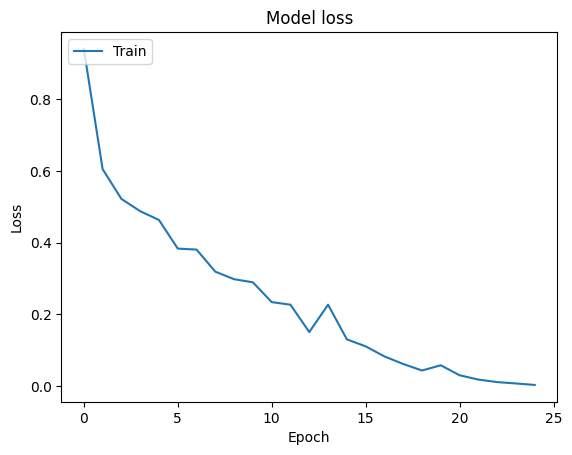

In [11]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
# Get the predictions
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the accuracy
acc = np.mean(y_pred == y_test)
print("Accuracy:", acc)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_matrix)


17/17 [==============================] - 1s 61ms/step
Accuracy: 0.825925925925926
Confusion Matrix: [[142   8  24]
 [  7 177   4]
 [ 50   1 127]]


In [13]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       174
           1       0.95      0.94      0.95       188
           2       0.82      0.71      0.76       178

    accuracy                           0.83       540
   macro avg       0.83      0.82      0.82       540
weighted avg       0.83      0.83      0.83       540



[[142   8  24]
 [  7 177   4]
 [ 50   1 127]]


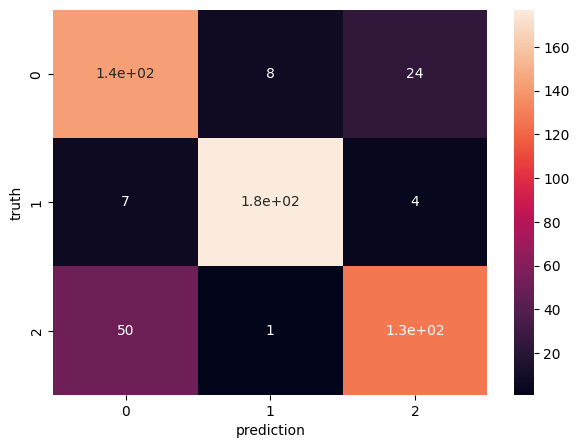

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(conf_matrix,annot=True)
plt.xlabel("prediction")
plt.ylabel('truth')
print(conf_matrix)

In [15]:
# Save the model
model.save('model.h5')
print("Model saved as model.h5")


Model saved as model.h5
